In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [16]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg'])
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()
job_order

['Senior Data Scientist',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Analyst',
 'Data Analyst']

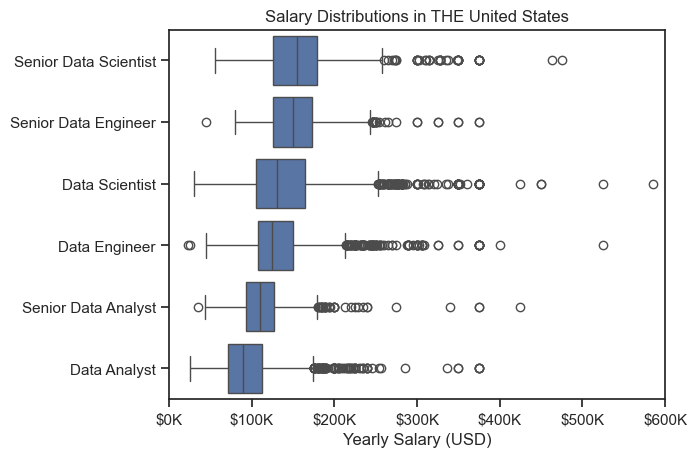

In [17]:
sns.boxplot(data = df_US_top6, x ='salary_year_avg', y= 'job_title_short',order = job_order)
sns.set_theme(style = 'ticks')

plt.title('Salary Distributions in THE United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel("")
plt.xlim(0 ,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [19]:
df_DA_US =df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US .dropna(subset =['salary_year_avg'])

In [44]:
df_DA_US['job_skills'] = df_DA_US['job_skills'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df_DA_US = df_DA_US.explode('job_skills')
print(df_DA_US)

       job_title_short                              job_title   job_location  \
109       Data Analyst  Senior Supply Chain Analytics Analyst       Anywhere   
109       Data Analyst  Senior Supply Chain Analytics Analyst       Anywhere   
109       Data Analyst  Senior Supply Chain Analytics Analyst       Anywhere   
109       Data Analyst  Senior Supply Chain Analytics Analyst       Anywhere   
180       Data Analyst                       Data Analyst III  Dos Palos, CA   
...                ...                                    ...            ...   
784882    Data Analyst   Merchandising Analyst (Data Analyst)     Denton, TX   
784882    Data Analyst   Merchandising Analyst (Data Analyst)     Denton, TX   
784882    Data Analyst   Merchandising Analyst (Data Analyst)     Denton, TX   
784882    Data Analyst   Merchandising Analyst (Data Analyst)     Denton, TX   
784882    Data Analyst   Merchandising Analyst (Data Analyst)     Denton, TX   

                      job_via job_sched

In [83]:
df_DA_top_pay =df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values( by ='median', ascending = False)
df_DA_top_pay =df_DA_top_pay.head(10)
df_DA_top_pay
df_DA_top_pay.reset_index()

,job_skills,count,median
0,['gcp'],1,254000.0
1,['github'],2,212430.0
2,'dplyr',2,196250.0
3,'bitbucket',3,189000.0
4,'gitlab'],3,186000.0
5,'solidity',1,179000.0
6,'hugging face',1,175000.0
7,'couchbase',1,160515.0
8,'ansible',1,159640.0
9,'php'],3,157500.0


In [67]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by = 'count',ascending = False)

df_DA_skills = df_DA_skills.head(10)
df_DA_skills

,count,median
job_skills,,
['sql',1866,92527.5
'python',1023,98800.0
'excel',942,85000.0
'tableau',759,92500.0
'sas',711,90000.0
'r',670,95000.0
'tableau'],552,95000.0
'excel'],509,87500.0
'sql',480,90000.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\2472654601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_top_pay, y = 'job_skills',x = 'median' , ax=ax[0], palette='dark:b_r',legend = False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\2472654601.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_skills, x='median', y= df_DA_skills.index,  ax=ax[1], palette='dark:b_r',)


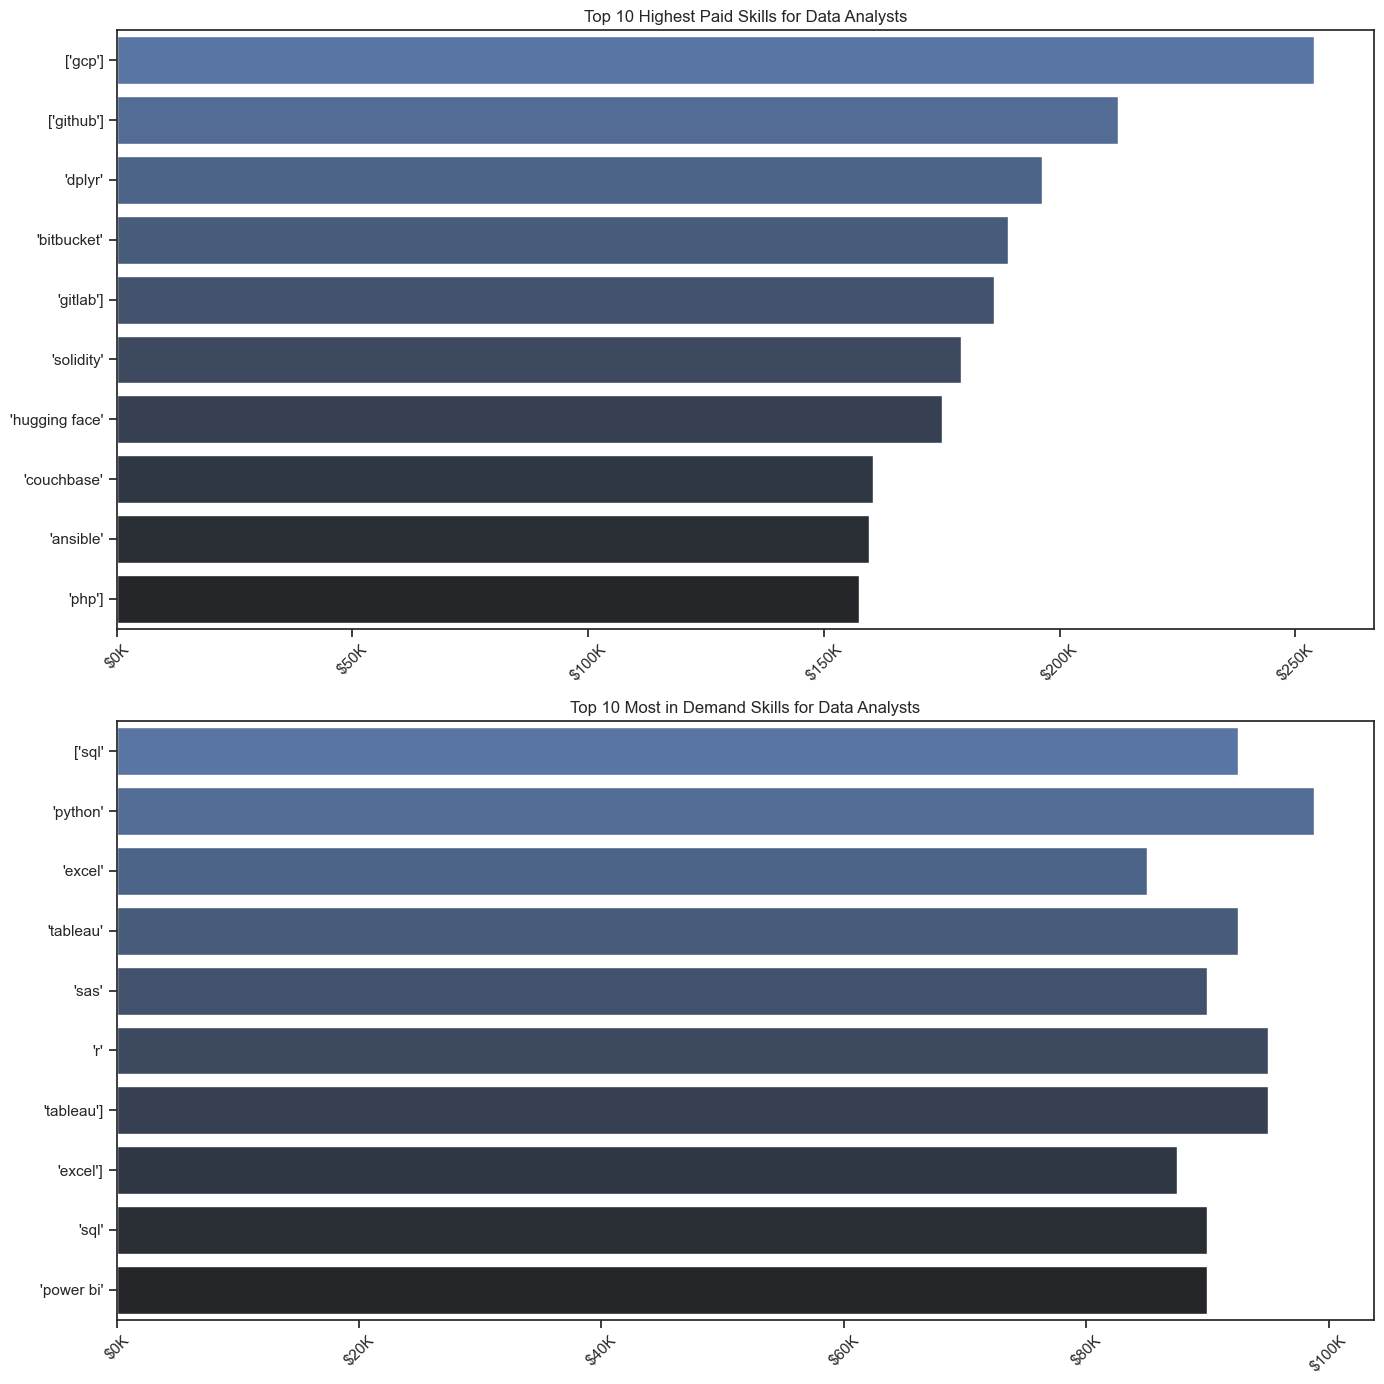

In [84]:

fig, ax = plt.subplots(2, 1, figsize=(14, 14))  
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1, hspace=0.5) 

sns.set_theme(style='ticks')


sns.barplot(data=df_DA_top_pay, y = 'job_skills',x = 'median' , ax=ax[0], palette='dark:b_r',legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts', fontsize=12)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].tick_params(axis='x', rotation=45)  

sns.barplot(data=df_DA_skills, x='median', y= df_DA_skills.index,  ax=ax[1], palette='dark:b_r',)
ax[1].set_title('Top 10 Most in Demand Skills for Data Analysts', fontsize=12)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()